In [15]:
from allosteryMI import MasterEquation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### The only input I give to the class `MasterEquation` are some initial quantities of species at t=0. From there it builds the full list of constitutive states and generator matrix from the reactions and rates given in the  config file reactions.cfg

In [12]:
# start with the single substrate example
single_substrate_initial = {'E':1, 'S':1, 'Y':1}

In [3]:
single_substrate = MasterEquation(initial_species=single_substrate_initial)

#### I can check the unique chemical species in the system

In [4]:
single_substrate.species

['E', 'ES', 'E^*', 'E^*S', 'P', 'PY', 'S', 'SE', 'SES', 'SE^*', 'SE^*S', 'Y']

#### the `constitutive_states` and `constitutive_states_strings` attributes give the full list of constitutive states generated. This agrees with what I found manually in the latex pdf

In [5]:
single_substrate.constitutive_states

[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

#### Or in a readable format:

In [6]:
single_substrate.constitutive_states_strings

[['1E', '0P', '0PY', '1S', '1Y'],
 ['0P', '0PY', '0S', '1SE', '1Y'],
 ['1ES', '0P', '0PY', '0S', '1Y'],
 ['0P', '0PY', '0S', '1SE^*', '1Y'],
 ['1E', '1P', '0PY', '0S', '1Y'],
 ['1E^*', '0P', '0PY', '1S', '1Y'],
 ['1E', '0P', '1PY', '0S', '0Y'],
 ['1E', '0P', '0PY', '0S', '1Y'],
 ['1E^*S', '0P', '0PY', '0S', '1Y'],
 ['1E^*', '1P', '0PY', '0S', '1Y'],
 ['1E^*', '0P', '1PY', '0S', '0Y'],
 ['1E^*', '0P', '0PY', '0S', '1Y']]

#### The generator matrix is also generated automatically and accesible through `the generator_matrix` attribute. I'm showing it as a Pandas DataFrame since it's more readable

In [7]:
pd.DataFrame(single_substrate.generator_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-100,50,50,0,0,0,0,0,0,0,0,0
1,25,-75,0,50,0,0,0,0,0,0,0,0
2,25,0,-25,0,0,0,0,0,0,0,0,0
3,0,70,0,-95,0,25,0,0,0,0,0,0
4,0,0,0,0,-50,0,50,0,0,0,0,0
5,70,0,0,50,0,-195,0,0,75,0,0,0
6,0,0,0,0,25,0,-25,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,25,0,0,-75,50,0,0
9,0,0,0,0,70,0,0,0,0,-120,50,0


#### Also keeping the rates as strings (need to change the -'s on the diagonal eventually):

In [8]:
pd.DataFrame(single_substrate.generator_matrix_strings)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-,k_{A+},k_{X+},0,0,0,0,0,0,0,0,0
1,k_{A-},-,0,h_p,0,0,0,0,0,0,0,0
2,k_{X-},0,-,0,f_{P},0,0,0,0,0,0,0
3,0,s_p,0,-,0,k_{A-},0,0,0,0,0,0
4,0,0,0,0,-,0,k_{Y+},d_P,0,0,0,0
5,s_p,0,0,k_{A+},0,-,0,0,k_{X^*+},0,0,0
6,0,0,0,0,k_{Y-},0,-,0,0,0,0,0
7,0,0,0,0,0,0,0,-,0,0,0,0
8,0,0,0,0,0,k_{X^*-},0,0,-,f_{P^*},0,0
9,0,0,0,0,s_p,0,0,0,0,-,k_{Y+},d_P


#### Now I can generate a $P(t)$ by calling the `run()` method with arguments `start`, `stop`, and `step`. It will store the results in an attribute `P_t`, which is an array with shape `(n_timesteps, n_constitutive_states)`

In [9]:
start = 0
stop = 50
step = 0.001
single_substrate.run(start, stop, step)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49999/49999 [00:00<00:00, 846674.06it/s]


In [10]:
single_substrate.P_t

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.05988184e-01, 4.58581178e-02, 4.70011203e-02, ...,
        1.75031875e-09, 1.46159601e-11, 0.00000000e+00],
       [8.22973578e-01, 8.42929837e-02, 8.84779534e-02, ...,
        5.02311611e-08, 8.40477887e-10, 0.00000000e+00],
       ...,
       [2.97078462e-26, 4.45165566e-26, 6.22588847e-26, ...,
        1.83826980e-27, 9.79279104e-28, 0.00000000e+00],
       [2.96739487e-26, 4.44657619e-26, 6.21878454e-26, ...,
        1.83617228e-27, 9.78161717e-28, 0.00000000e+00],
       [2.96400898e-26, 4.44150251e-26, 6.21168872e-26, ...,
        1.83407716e-27, 9.77045605e-28, 0.00000000e+00]])

#### Here's a quick plot of the results

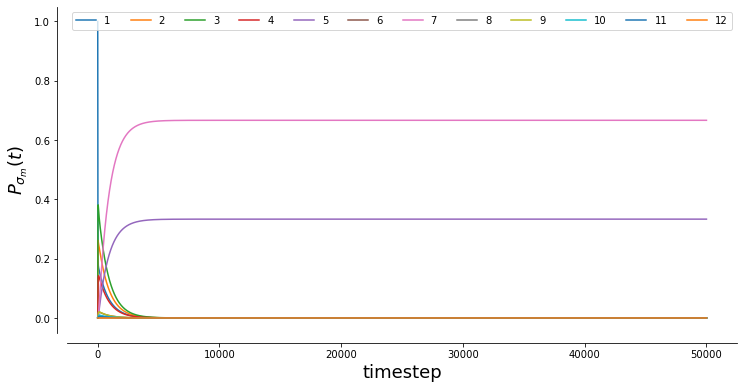

In [49]:
results = single_substrate.P_t
n_cols = results.shape[1]
cols = [results[:,i] for i in range(n_cols)]

fig = plt.figure(figsize=(12,6))
for i, column in enumerate(cols):
    plt.plot(column, label=f'{i+1}')
plt.ylabel(r'$P_{\sigma_m}(t)$', rotation=90,  fontsize=18)
plt.xlabel('timestep', fontsize=18)
sns.despine(offset=10)
plt.legend(loc='upper right', ncol=n_cols)
plt.show()

#### Now with 5 S, 5 Y

In [52]:
S5_Y5_initial = {'E':1, 'S':5, 'Y':5}

In [53]:
S5_Y5 = MasterEquation(initial_species=S5_Y5_initial)

#### Quickly check to make sure my calculation for the number of constitutive states is consistent with the program:

In [54]:
len(S5_Y5.constitutive_states)

292

#### 5S, 1Y :

In [57]:
S5_Y1_initial = {'E':1, 'S':5, 'Y':1}

In [59]:
S5_Y1 = MasterEquation(initial_species=S5_Y1_initial)

#### Double check number of constitutive states generated

In [60]:
len(S5_Y1.constitutive_states)

204

#### The full list in string format is also available for checking what $\sigma_m$ is in a readable format

In [63]:
S5_Y1.constitutive_states_strings

[['1E', '0P', '0PY', '5S', '1Y'],
 ['0P', '0PY', '4S', '1SE', '1Y'],
 ['1ES', '0P', '0PY', '4S', '1Y'],
 ['0P', '0PY', '3S', '1SES', '1Y'],
 ['0P', '0PY', '4S', '1SE^*', '1Y'],
 ['1E', '1P', '0PY', '4S', '1Y'],
 ['1P', '0PY', '3S', '1SE', '1Y'],
 ['1E^*', '0P', '0PY', '5S', '1Y'],
 ['1E^*S', '0P', '0PY', '3S', '1Y'],
 ['1ES', '1P', '0PY', '3S', '1Y'],
 ['1E', '0P', '1PY', '4S', '0Y'],
 ['1E', '0P', '0PY', '4S', '1Y'],
 ['1P', '0PY', '2S', '1SES', '1Y'],
 ['1P', '0PY', '3S', '1SE^*', '1Y'],
 ['0P', '1PY', '3S', '1SE', '0Y'],
 ['0P', '0PY', '3S', '1SE', '1Y'],
 ['1E^*S', '0P', '0PY', '4S', '1Y'],
 ['1E^*', '0P', '0PY', '4S', '1Y'],
 ['0P', '0PY', '2S', '1SE^*S', '1Y'],
 ['1E^*', '1P', '0PY', '3S', '1Y'],
 ['1E', '2P', '0PY', '3S', '1Y'],
 ['1ES', '0P', '1PY', '3S', '0Y'],
 ['1ES', '0P', '0PY', '3S', '1Y'],
 ['2P', '0PY', '2S', '1SE', '1Y'],
 ['0P', '1PY', '2S', '1SES', '0Y'],
 ['0P', '0PY', '2S', '1SES', '1Y'],
 ['1E^*', '1P', '0PY', '4S', '1Y'],
 ['1E^*S', '1P', '0PY', '2S', '1Y'],
 ['0

#### Generator matrix won't fit on the screen here

In [61]:
pd.DataFrame(S5_Y1.generator_matrix)

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,-100,50,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,-125,0,50,50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0,-75,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,25,-50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,70,0,0,-170,0,0,25,75,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-120,0,0,0,50
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-100,0,0,50
201,0,0,0,0,0,0,0,0,0,0,...,0,0,25,0,0,0,0,-25,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Here's what the results look like in this case

In [64]:
S5_Y1.run(start=start, stop=stop, step=step)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49999/49999 [00:00<00:00, 131803.28it/s]


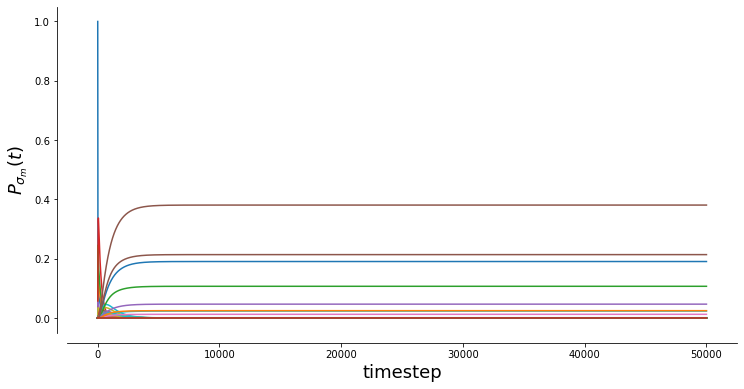

In [67]:
results2 = S5_Y1.P_t

n_cols = results2.shape[1]
cols = [results2[:,i] for i in range(n_cols)]

fig = plt.figure(figsize=(12,6))
for i, column in enumerate(cols):
    plt.plot(column)
plt.ylabel(r'$P_{\sigma_m}(t)$', rotation=90,  fontsize=18)
plt.xlabel('timestep', fontsize=18)
sns.despine(offset=10)
plt.show()

#### I didn't include a legend because it would take up too much space with 204 elements